In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

We will first generate random clusters of data

In [52]:
def generate_clusters(num_clusters=4, sigma=1, num_points_per_cluster=100):
    
    points_xcoord = []
    points_ycoord = []
    center_list=[]
    
    for i in range(num_clusters):
        
        center_x = np.random.uniform(-8*sigma, 8*sigma)
        center_y = np.random.uniform(-8*sigma, 8*sigma)
        
        center_list.append((center_x, center_y))
        
        delta_xs = np.random.normal(0, sigma, num_points_per_cluster)
        delta_ys = np.random.normal(0, sigma, num_points_per_cluster)
        
        for deltax, deltay in zip(delta_xs, delta_ys):
            points_xcoord.append(center_x + deltax)
            points_ycoord.append(center_y + deltay)
            
    
    return center_list, points_xcoord, points_ycoord

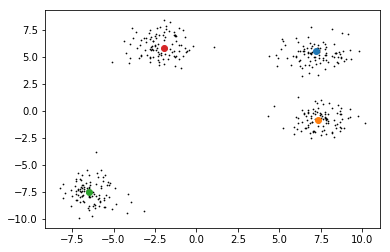

In [53]:
%matplotlib inline

centers, x_coords, y_coords = generate_clusters()

plt.scatter(x_coords, y_coords, color='k', s=0.5)

for center in centers:
    plt.scatter(center[0], center[1])

# Assignment 2

# K-means algorithm
--------------

k-means is one of the most popular clustering algorithms, mainly because of its simplicity and ability
to scale to very large datasets.

k-means works on the basis of the square of the euclidean distance, and tries to minimize the
total distance between points assigned to a cluster.

The [algorithm](https://en.wikipedia.org/wiki/K-means_clustering#Algorithms) is as follows:

1. Choose N, the number of expected clusters in your data.
2. Choose N random points from your input data. These are your current centers.
3. For each point,
    4. Find the square of the euclidean distance of the point from the current centers.
    4. Assign that point to the center that is closest to it.
5. Now, every point is part of a cluster.
6. Find the centroid of each cluster. Assign these as your current centers
7. Repeat the above steps until the change in the cluster centers is very small (you can choose what "small" is).

A good skill to learn is to be able to be able to write down what functions you will need before actually writing any code. 

Any well-written program in python will almost look like english. To achieve this, we need to ensure all programming logic is encapsulated in functions.

In this tutorial we will work on this skill. We will first just define functions using ellipsis notation.

In [16]:
#create tuples from the x and y coordinates and add it to list of all points

def generate_coord_tuple(points_xcoords, points_ycoords):
    tupled_points=[] #array to store the points after converting to tuples
    
    for i in range(0, len(points_xcoords)): #wlog either len of xcoords list or ycoords list works
        tupled_points.append((points_xcoords[i],points_ycoords[i]))
    
    return tupled_points




In [17]:
#using coords of points to find distance between them
def find_distance(point1, point2):
    
    diff_in_x= point1[0]- point2[0]   
    diff_in_y= point1[1]- point2[1]
    
    distance_btw_point1_point2= np.sqrt(diff_in_x**2 + diff_in_y**2)
    
    return distance_btw_point1_point2


In [18]:
#randomly pick initial centers
#N is chosen number of clusters

def choose_initial_centers(number_of_clusters, points):
    list_of_random_centers=[] #array to store the random centers
    
    for i in range(0,number_of_clusters):
        element_number = random.randrange(0,len(points))
        list_of_random_centers.append(points[element_number])
    
    return list_of_random_centers


In [19]:
def find_closest_center(number_of_clusters, points, centers):
    
    point_and_closest_center=[] #array to store point with the index of the center it is closest to
    
    for i in range (0,len(points)):
        dist_from_centers=[] #array to store distance from centers
        dist_from_centers_w_index=[]

        for j in range (0, len(centers)):
            
            dist_from_centers.append(find_distance(points[i], centers[j]))
            
            #the distance from a center and the center index is added as a list element to the dist_from_centers_w_index list
            
            dist_from_centers_w_index.append([ find_distance(points[i], centers[j])  , centers[j]]) 
            
        for j in range (0, len(centers)):
            
            if dist_from_centers_w_index[j][0] == np.min (dist_from_centers):
                                      
                point_and_closest_center.append([points[i],j])
    
    return point_and_closest_center #array contains point and the index of the center it belongs to


In [20]:
def create_new_centers(number_of_clusters, points, centers, closest_center):
    
    
    new_centers=[] #array to store new centers
    for center_index in range (0, len(centers)):
        cluster_xcoords=[] #array to store x coords of a given cluster
        cluster_ycoords=[] #array to store y coords of a given cluster
        for point_index in range(0,len(closest_center)):
            if closest_center[point_index][1] == center_index:
                cluster_xcoords.append(closest_center[point_index][0][0])
                cluster_ycoords.append(closest_center[point_index][0][1])

        
        new_center=(np.mean(cluster_xcoords), np.mean(cluster_ycoords))
               
        new_centers.append(new_center)
    return new_centers
                

Afterwards, you can code the k-means algorithm, which should do nothing but call the above functions.

In [21]:
N=4 #number of clusters

all_points = generate_coord_tuple(x_coords,y_coords) #creating list of tuples of all points

In [22]:
list_of_random_centers = choose_initial_centers(N, all_points) #initial center

In [23]:

current_centers = list_of_random_centers #setting initial center state to random centers
dynamic_centers =[] #list of centers over all interations to see how they dynamically move

iterator=0

while iterator<1000:
    dynamic_centers.append(current_centers)
    closest_centers= find_closest_center(N, all_points, current_centers)
    new_centers= create_new_centers(N, all_points, centers, closest_centers)
    current_centers= new_centers
    iterator+=1


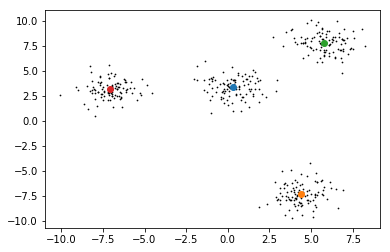

In [24]:
%matplotlib inline
plt.scatter(x_coords, y_coords, color='k', s=0.5)

for center in current_centers:
    plt.scatter(center[0], center[1])

## Cases where clustering failed
This section was for trial and error generation of graphs (error foraging). Findings are in the pdf attached.

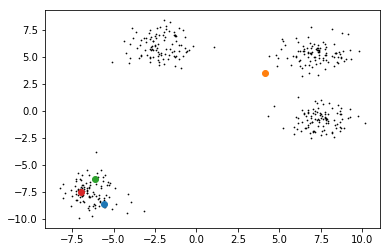

In [54]:
%matplotlib inline

N=4 #number of clusters
all_points = generate_coord_tuple(x_coords,y_coords) #creating list of tuples of all points

list_of_random_centers= choose_initial_centers(N, all_points) #initial center
current_centers= list_of_random_centers #setting initial center state to random centers
dynamic_centers=[] #list of centers over all interations to see how they dynamically move

iterator=0

while iterator<1000:
    dynamic_centers.append(current_centers)
    closest_centers= find_closest_center(N, all_points, current_centers)
    new_centers= create_new_centers(N, all_points, centers, closest_centers)
    current_centers= new_centers
    iterator+=1

plt.scatter(x_coords, y_coords, color='k', s=0.5)

for center in current_centers:
    plt.scatter(center[0], center[1])

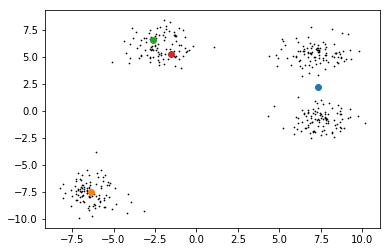

In [55]:
%matplotlib inline

N=4 #number of clusters
all_points = generate_coord_tuple(x_coords,y_coords) #creating list of tuples of all points

list_of_random_centers= choose_initial_centers(N, all_points) #initial center
current_centers= list_of_random_centers #setting initial center state to random centers
dynamic_centers=[] #list of centers over all interations to see how they dynamically move

iterator=0

while iterator<1000:
    dynamic_centers.append(current_centers)
    closest_centers= find_closest_center(N, all_points, current_centers)
    new_centers= create_new_centers(N, all_points, centers, closest_centers)
    current_centers= new_centers
    iterator+=1

plt.scatter(x_coords, y_coords, color='k', s=0.5)

for center in current_centers:
    plt.scatter(center[0], center[1])

# Other attempts at clustering
I have a bunch of different approaches to clusters that I tried out because K-means clustering results were not satisfying enough. 
Some of them dont work, because they are computationally intensive and I want to discuss potential improvements to them, to make it faster.

In [23]:
def find_avg_dist (all_points):
    array_all_dist=[]
    for i in range(0,len(all_points)):
        for j in range(0,len(all_points)):
            if find_distance(all_points[i],all_points[j]) > 0:
                array_all_dist.append(find_distance(all_points[i],all_points[j]))
    return np.mean(array_all_dist)


def make_better_clusters( all_points ):
    # choose a random point 
    randomizer=random.randrange(0,len(all_points))
    initial_point= all_points[randomizer]

    #set a threshold distance based on avg distance between points.
    #if within the threshold, then it belongs to cluster of the initial point.
    #if not within the threshold, then it nucleates a new cluster.
    #we can either fix the number of clusters, or let it decide.

    avg_dist = find_avg_dist (all_points)

    points_w_clusterindex = []
    new_cluster_initiating_points = [[initial_point,0]]

    for i in range (0, len (all_points)):
        cluster_index=0
        #if find_distance (all_points[i], initial_point)<= avg_dist :
        #   points_w_clusterindex.append([all_points[i],cluster_index])

        #elif find_distance (all_points[i], initial_point)> avg_dist:
        for j in range(len(new_cluster_initiating_points)):
            if find_distance (new_cluster_initiating_points[j][0], all_points[i])<= avg_dist :
                points_w_clusterindex.append([all_points[i],new_cluster_initiating_points[j][1]])
            else:
                cluster_index +=1
                new_cluster_initiating_points.append([all_points[i],cluster_index])
    
    return points_w_clusterindex, new_cluster_initiating_points        

#this one takes too long to run, i dont know how to improve it furthur


    

In [33]:
#the recurring problem in k means clustering seems to be the choice of initial centers
#so maybe choosing better centers makes the clustering more effecient. 
#one way to partially fix this is by ensuring atleast some threshold amount of points around the point.
# ill use avg distance between any two points to create the ball here and we'll make it choose initial centers from points that have atleast 75 points around them 
# assumption is that all clusters have roughly the same numbers of points in them. 



def find_points_around_point(points, given_point):
    number_of_points=0
    avg_dist = find_avg_dist (points)
    for i in range (0,len(points)):
        if find_distance(points[i], given_point) <= avg_dist:
            number_of_points+=1
    return number_of_points

print (find_points_around_point(all_points,centers[0]))


def choose_better_initial_centers(number_of_clusters, points):
    list_of_random_centers=[]
    
    while True:
        element_number = random.randrange(0,len(points))
        if find_points_around_point(points, points[element_number]) > 75 :
            list_of_random_centers.append(points[element_number])
        if len(list_of_random_centers) == number_of_clusters:
            return list_of_random_centers

#this fixes the issue where stray points are chose as cluster centers


188


In [ ]:
#let's use the scoring method that is based on number of points within a 2D ball of the point.